In [1]:
import os
import sys
import numpy as np
from chrmt_generator import TranscriptomeGenerator, TranscriptomePredictor
from tensorflow.keras.models import load_model
from tqdm import tqdm
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

window_size = 100


In [ ]:
test_generator = TranscriptomeGenerator(window_size,
                   1,
                   shuffle=False,
                   mode='testing',
                   masking_probability=0.0,
                   cell_type=0)

In [ ]:
trained_model_path = "../Run_Transcriptome_TSS_transcriptome_100_64_5_0.0.model-100.hdf5"
trained_model = load_model(trained_model_path)

H3K27ac_max = []

np.set_printoptions(precision=3, suppress=True)
yTrue = []
yPred = []
for i in range(2000):

    X, Y = test_generator.__getitem__(i)

    H3K27ac_max.append(np.max(X[:, :, 2]))
    
    yPred_value = trained_model.predict(X)
    yTrue.append(Y[0][0])
    yPred.append(yPred_value[0][0])
#     print(i, Y, yPred, yPred.shape, "\n")
# print(list(zip(yTrue, yPred)))

pc, _ = pearsonr(yTrue, yPred)
sc, _ = spearmanr(yTrue, yPred)
# print("Pearson =", round(pc, 3), "Spearman =", round(sc, 3))

In [ ]:
plt.rcParams["figure.figsize"] = (20, 12)
plt.plot(yTrue, yPred, 'o', markersize=4, color='green')
plt.xlabel("True Normalized TPM", size=40)
plt.ylabel("Predicted Normalized TPM", size=40)
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.title("Pearson = "+str(round(pc, 3))+" Spearman = "+str(round(sc, 3)), size=50)
plt.show()

In [ ]:
# Create the ability to save a location as a datapoint
# CXCR4: Chromosome 2: 136,114,349-136,118,149 reverse strand.
# chrom="chr2", start=int(136118149/100), strand="-"
# CXCR4_ground_truth = 

# Alternative CXCR4:
# chrom="chr2", start=int(136116243/100), strand="-"

# TGFBR1: Chromosome 9: 99,105,113-99,154,192 forward strand.
# chrom="chr9", start=int(99105113/100), strand="+"
# TGFBR1_ground_truth = 

In [7]:
RESOLUTION = 100
prediction_generator = TranscriptomePredictor(window_size,
                       1,
                       shuffle=False,
                       mode='testing',
                       masking_probability=0.0,
                       cell_type=0,
                       # chrom="chr2", start=int(136118149/RESOLUTION), strand="-")  # CXCR4
                       chrom="chr2", start=int(136116243/100)+1, strand="-") # CXCR4 alternative
#                        chrom="chr9", start=int(99105113/RESOLUTION), strand="+")  # TGFBR1

trained_model_path = "../Run_Transcriptome_TSS_transcriptome_100_64_5_0.0.model-100.hdf5"
trained_model = load_model(trained_model_path)

for i in range(1):

    X, Y = prediction_generator.__getitem__(i)
    yPred_value = trained_model.predict(X)
    print(Y[0][0], yPred_value[0][0])
    np.save("CXCR4.alternative.npy", X)

Loading TSS data
TSS strand information is invalid
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Load

Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.-.npy
Loading Epigenome data

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.-.npy
Batch Number 0 1361163 chr2 1361163 -


-0.3 -0.2902447


In [ ]:
trained_model_path = "../Run_Transcriptome_TSS_transcriptome_100_64_5_0.0.model-100.hdf5"
trained_model = load_model(trained_model_path)

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


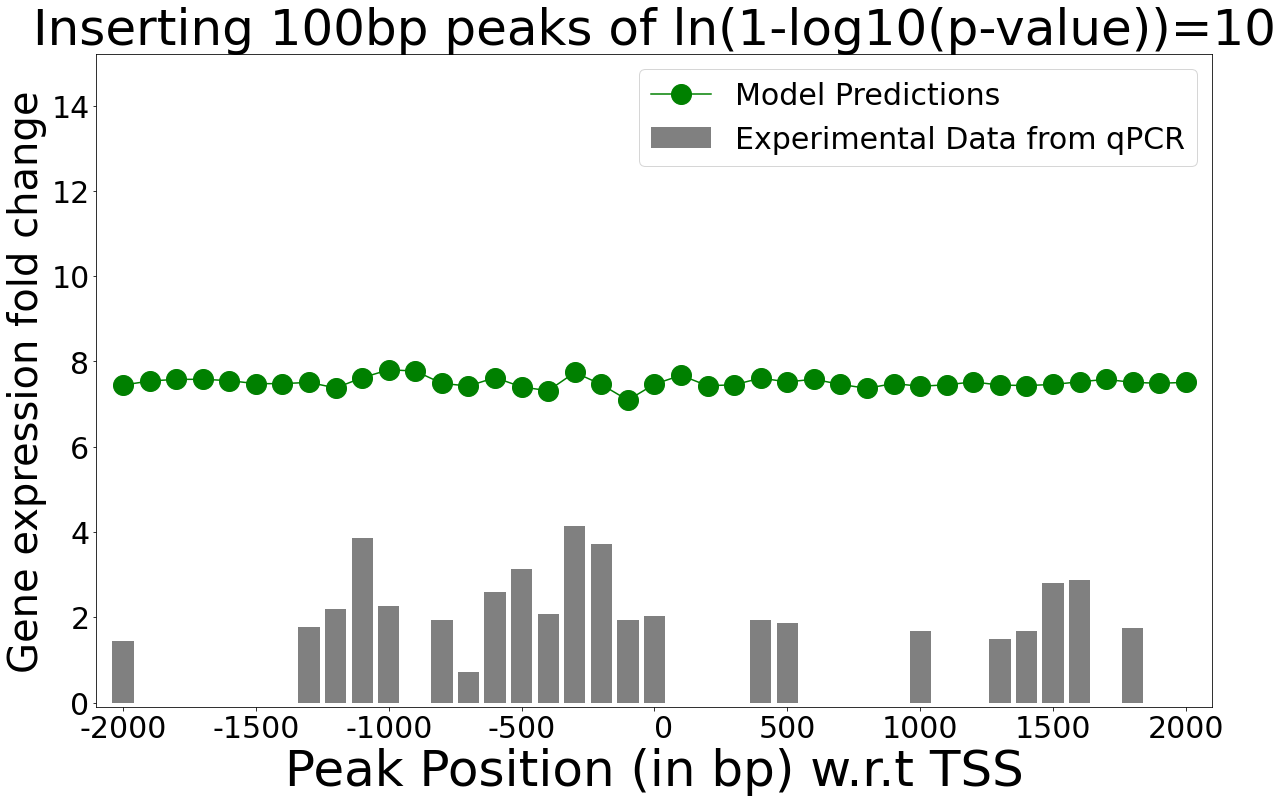

In [13]:
# Alan's H3K27ac dataset
Alan_CXCR4 = [1.453222375, 0, 0, 0, 0, 0, 0, 1.773646277, 2.187903627, 3.856850008, 2.260462348, 0, 1.937173882, 0.72042162, 2.593777357, 3.125318412, 2.085622782, 4.1290001, (0*5.365214728+1*3.7242471)/1, (0.904149896+2.956134123)/2, 2.026565106, 0, 0, 0, 1.9370678, 1.855946421, 0, 0, 0, 0, 1.681179385, 0, 0, 1.500528231, 1.680141559, 2.812252952, 2.885583522, 0, 1.738983338, 0, 0]

Alan_TGFBR1 = [1.399673235, 0, 0, 0, 0, 1.166973111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.213136785, 0, 0, 1.363500234, 1.580908952, 1.005685221, 1.137342784, 1.288736755, 0, 1.510086285, 0, 0, 0, 0, 0, 0.993216049, 0, 0, 0, 0, 0, 0, 0, 0.909890068, 0, 0]

# Load features for CXCR4 and TGFBR1
# X = np.load("CXCR4.npy")  # p30, 8*, +1.5, - 12.5 
X = np.load("CXCR4.alternative.npy")  # p30, 8*, +1.5, - 12.5 
# X = np.load("TGFBR1.npy")   # p5,  4*, +1.5, - 12.5

# Hyperparameters for inference
inserted_minuslog10p_value = 10

# Perform inference on CXCR4 and TGFBR1 by introducing p-value changes
yPred = []
center = int(window_size / 2)
positions = range(center - 20, center + 21)
for pos in positions:
    X_modified = np.copy(X)
    X_modified[:, pos, 2] = inserted_minuslog10p_value
    yPred_value = np.expm1(trained_model.predict(X_modified))
#     print(pos, yPred_value[0][0])
    yPred.append(yPred_value[0][0])

plt.rcParams["figure.figsize"] = (20, 12)
visualization_arbitrary_scaling_factor = 3
plt.plot(range(-20, 21), ([(8 * (xx + 1.5)) - 2.5 for xx in yPred]), 'o-', color='g', markersize=20, label="Model Predictions")
plt.bar(range(-20, 21), Alan_CXCR4, color='gray', label="Experimental Data from qPCR")
plt.xlim(-21, 21)
plt.ylim(-0.1, 15.2) 
ax=plt.gca() 
x_vals = ax.axes.get_xticks()
ax.set_xticklabels(['{:3.0f}'.format(x * 100) for x in x_vals])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.xlabel("Peak Position (in bp) w.r.t TSS", size=50)
plt.ylabel("Gene expression fold change", size=40)
plt.legend(loc=1, prop={'size': 30})
plt.title("Inserting 100bp peaks of ln(1-log10(p-value))="+str(inserted_minuslog10p_value), size=50)
plt.show()
plt.close()



In [ ]:
[np.min(H3K27ac_max), np.median(H3K27ac_max), np.max(H3K27ac_max)]

In [ ]:
x_CXCR4 = np.load("CXCR4.npy")
[np.min(x_CXCR4[:, :, 1]), np.median(x_CXCR4[:, :, 2]), np.max(x_CXCR4[:, :, 2])]

In [ ]:
x_TGFBR1 = np.load("TGFBR1.npy")
[np.min(x_TGFBR1[:, :, 1]), np.median(x_TGFBR1[:, :, 2]), np.max(x_TGFBR1[:, :, 2])]

In [ ]:
pow(2.7, 30)